In [1]:
library(lmerTest) #like lmer but with p-value
library(ggpubr) #for ggplot
library(performance) #r2 in mixed effect models
library(lattice) #qqmath

Loading required package: lme4

Loading required package: Matrix


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Loading required package: ggplot2

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Warning message:
"package 'performance' was built under R version 4.0.5"


In [2]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

## Download data

In [60]:
name_method = 'ML-method_'
#name_method = 'TD-method_'

In [67]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/CleaningAnalysis_/Cleaning/Raw&Cleaned'
name = paste0(name_method,'df4DifferenceModelling')
sink(file.path(path_,paste(name,'.txt', sep='')))
df = read.csv(file.path(path_, paste(name,'.csv', sep='')), header = TRUE, sep = ";")
df$PenID = as.factor(df$PenID)
df$Trackingsystem_Zone = as.factor(df$Trackingsystem_Zone)
df$HenID = as.factor(df$HenID)
df$level = as.factor(df$level)
df$sqrt_diff_rate = sqrt(df$diff_rate)
print(dim(df))
summary(df)

[1] 35792     8


 absolute_difference   diff_rate          PenID            Trackingsystem_Zone
 Min.   : 0.000      Min.   :0.0000   Pen 9  :4848   nbr_stays_1_Zone:5372    
 1st Qu.: 0.000      1st Qu.:0.7391   Pen 10 :4685   nbr_stays_2_Zone:7601    
 Median : 1.000      Median :0.9333   Pen 11 :4645   nbr_stays_3_Zone:7624    
 Mean   : 3.402      Mean   :0.8403   Pen 4  :4491   nbr_stays_4_Zone:7736    
 3rd Qu.: 4.000      3rd Qu.:1.0000   Pen 12 :4484   nbr_stays_5_Zone:7459    
 Max.   :71.000      Max.   :1.0000   Pen 3  :4335                            
                                      (Other):8304                            
     HenID              level       humidity_avgpercent sqrt_diff_rate    
 hen_19 :  285   2020-12-17:  674   Min.   : 59.75      Min.   :-4.60517  
 hen_84 :  281   2020-11-18:  662   1st Qu.: 76.25      1st Qu.:-0.28884  
 hen_1  :  280   2021-01-11:  661   Median : 84.12      Median :-0.05834  
 hen_113:  280   2020-11-15:  660   Mean   : 84.17      Mean   :-0.2

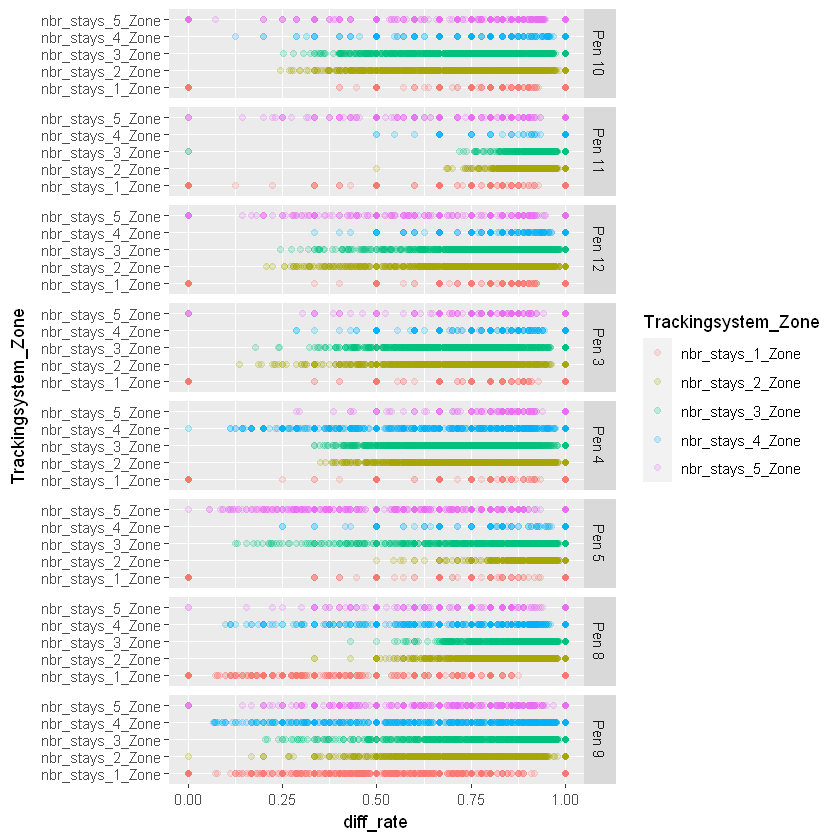

In [62]:
ggplot(df, aes(y=Trackingsystem_Zone, x=diff_rate, col=Trackingsystem_Zone)) + geom_point(alpha = 1/5) + facet_grid(PenID ~ .)
ggsave(path=path_, width=9, height=6, device='tiff', filename=paste('DiffRate_',name,'.jpg', sep=''), dpi=700)

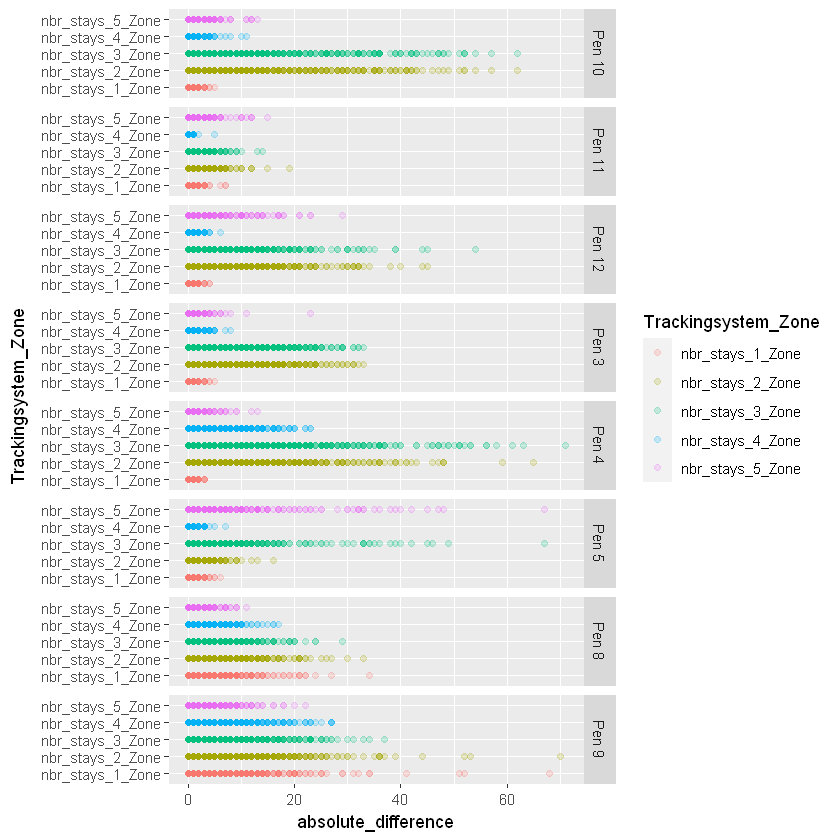

In [57]:
ggplot(df, aes(y=Trackingsystem_Zone, x=absolute_difference, col=Trackingsystem_Zone)) + geom_point(alpha = 1/5) + facet_grid(PenID ~ .)
ggsave(path=path_, width=9, height=6, device='tiff', filename=paste('AbsoluteDifference_',name,'.jpg', sep=''), dpi=700)

# Model


Correlation matrix not shown by default, as p = 41 > 12.
Use print(item$value, correlation=TRUE)  or
    vcov(item$value)        if you need it



Correlation matrix not shown by default, as p = 41 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sqrt_diff_rate ~ humidity_avgpercent + PenID * Trackingsystem_Zone +  
    (1 | HenID) + (1 | level)
   Data: df

REML criterion at convergence: 48656.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.5738 -0.1274  0.1070  0.3431  3.1580 

Random effects:
 Groups   Name        Variance  Std.Dev.
 HenID    (Intercept) 0.0141433 0.11893 
 level    (Intercept) 0.0006486 0.02547 
 Residual             0.2238067 0.47308 
Number of obs: 35792, groups:  HenID, 140; level, 57

Fixed effects:
                                                  Estimate Std. Error
(Intercept)                                     -1.817e-01  4.610e-02
humidity_avgpercent                             -4.185e-04  3.744e-04
PenIDPen 11                                     -4.472e-02  4.729e-02
PenIDPen 12                                      4.761e-02  4.773e-02
PenIDPen 3                                      -3

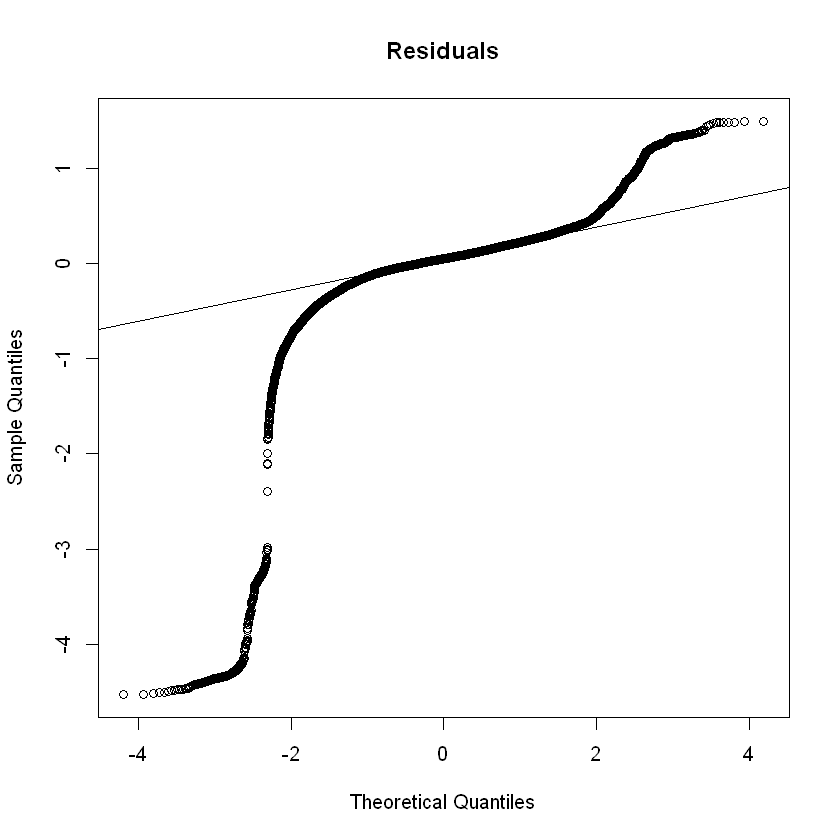

In [68]:
fit = lmerTest::lmer(sqrt_diff_rate ~ humidity_avgpercent + PenID*Trackingsystem_Zone + (1|HenID)+(1|level), data = df)
#Hence, this boils down to comparing the variation between different PenID (having 7 degrees of freedom) to the variation 
#due to the interaction between Trackingsystem_Zone and HenID (having  5*159=795  degrees of freedom).
capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))

In [66]:
#from: https://easystats.github.io/performance/index.html
capture.output(r2(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
r2(fit)

# R2 for Mixed Models

  Conditional R2: 0.336
     Marginal R2: 0.248

In [43]:
#rand: Likelihood Ratio Test On Random Effects Of Linear Mixed Effects Model
#tests the hypothesis that the random effect variation is significant versus the null that there is no between group-level 
capture.output(rand(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
#variation
rand(fit)

,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,44,-28586.77,57261.54,NA,NA,NA
(1 | HenID),43,-31223.87,62533.73,5274.1949,1,0.000000e+00
(1 | level),43,-28678.10,57442.21,182.6689,1,1.266839e-41


In [44]:
ranef(fit)

$HenID
         (Intercept)
hen_1    0.207157243
hen_10   0.195755804
hen_101 -0.228376020
hen_102 -0.359984639
hen_105  0.317587318
hen_106  0.355634837
hen_107  0.167367362
hen_108 -0.085365277
hen_109  0.069899336
hen_111 -0.021148692
hen_112 -0.055337994
hen_113 -0.059686597
hen_115  0.189017403
hen_116 -0.457622044
hen_118  0.005638321
hen_119 -0.155966942
hen_12   0.335893758
hen_120 -0.049995283
hen_122 -0.281205161
hen_123 -0.086396436
hen_124 -0.205076815
hen_126 -0.131679390
hen_127  0.297145818
hen_128 -0.127419275
hen_13   0.038908614
hen_131 -0.221088742
hen_133 -0.051747303
hen_134 -0.001647542
hen_135  0.410738226
hen_136 -0.397463995
hen_137 -0.072204295
hen_138  0.103777568
hen_139 -0.072204224
hen_14  -0.172729327
hen_140  0.157072152
hen_141 -0.228475606
hen_142  0.020991821
hen_143  0.090961622
hen_144 -0.121093426
hen_145 -0.221728999
hen_146 -0.319595479
hen_147  0.493101887
hen_149 -0.095580200
hen_15  -0.273049353
hen_150  0.522995591
hen_151 -0.057846489
hen_15

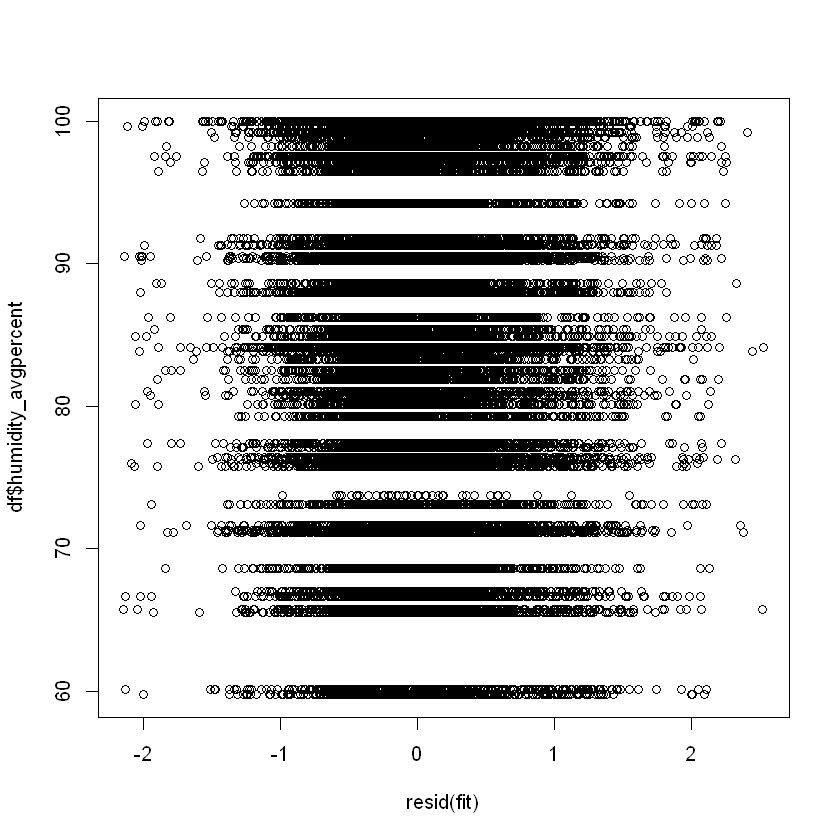

In [45]:
###### check if the residuals are independent. This can be checked by plotting residuals against covariates
plot(resid(fit), df$humidity_avgpercent)

In [46]:
######linearity of predictors: plot residual vs observed
jpeg(file.path(path_, paste('diagnostic_plot_linearity_',name,'.jpg', sep='')))
plot(resid(fit),df$sqrt_diff_rate)
dev.off()

png 
  2

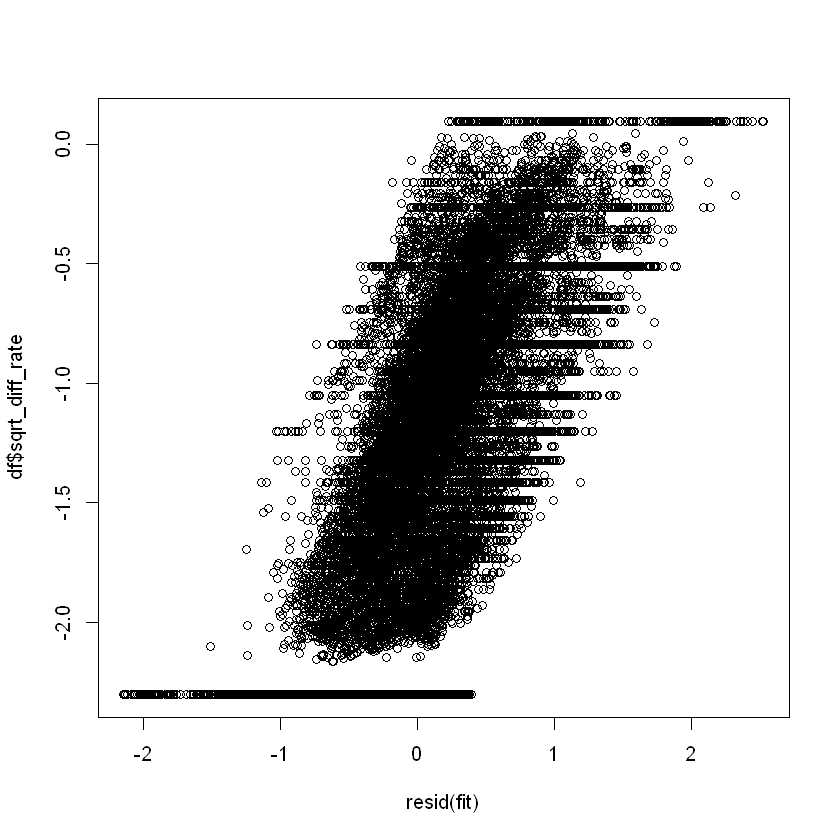

In [47]:
plot(resid(fit),df$sqrt_diff_rate)

In [48]:
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
jpeg(file.path(path_, paste('diagnostic_plot_homo-var_',name,'.jpg', sep='')))
plot(fit)
dev.off()

png 
  2

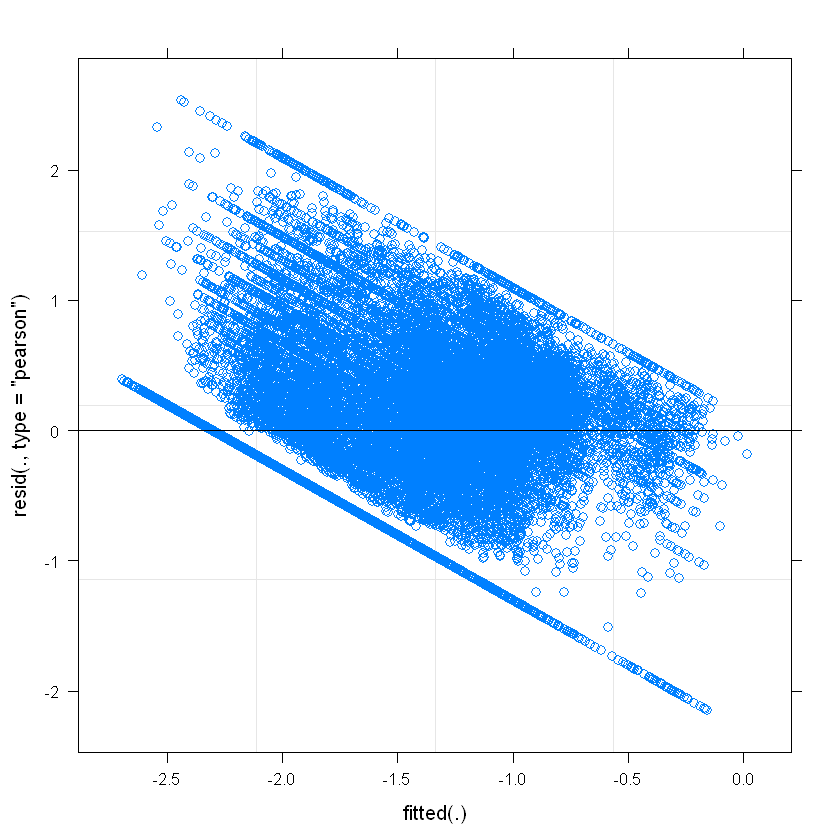

In [49]:
plot(fit)

In [50]:
###### normally distributed residuals
#normally distributed residuals
#qqmath(fit) #same
jpeg(file.path(path_, paste('diagnostic_plot_normal-resid_',name,'.jpg', sep='')))
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
dev.off()

png 
  2

$HenID

$level


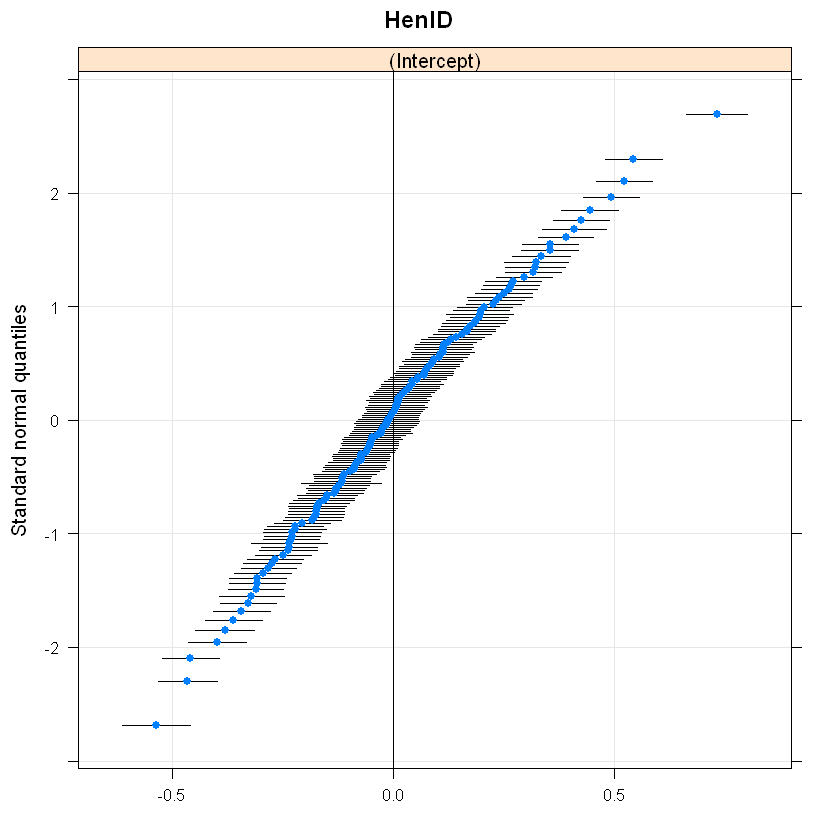

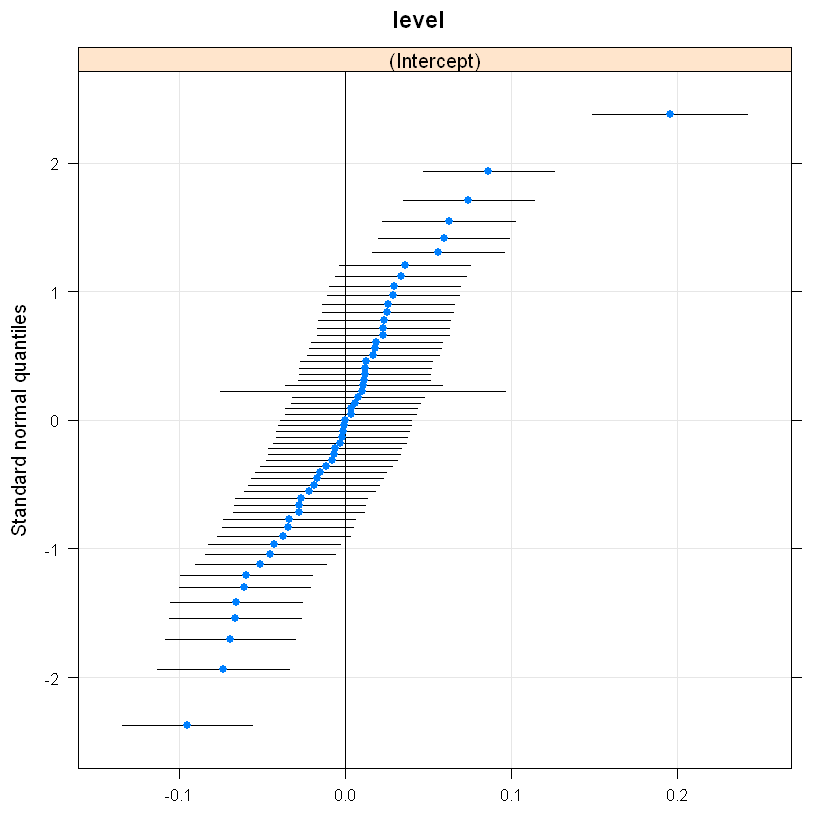

In [52]:
###### normally of random effects
qqmath(ranef(fit))